In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [19]:
placement=pd.read_excel(r'/Users/BaBa/Downloads/Input Data/Prediction of Placement Status Data/Train Data.xlsx')

In [20]:
df.head()

,First Name,Email ID,College Name,Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,AP SHAH INSTITUTE OF TECHNOLOGY,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,Don Bosco College of Engineering Fatorda Goa,Students,NaN,6.5,4,3,Not placed
3,Pooja,pooja@xyz.com,Pillai College of Engineering New Panvel,Students,NaN,8.7,2,5,Not placed
4,Aayush,aayush@xyz.com,St Xavier's College,Students,NaN,9.1,3,5,Placed


In [21]:
df_copy=df.copy()

In [22]:
df_copy.shape

(740, 9)

In [23]:
df_copy.dtypes

First Name             object
Email ID               object
College Name           object
Designation            object
Year of Graduation    float64
CGPA                  float64
Speaking Skills         int64
ML Knowledge            int64
Placement Status       object
dtype: object

In [24]:
df_copy.isnull().sum()

First Name              0
Email ID                0
College Name            4
Designation             0
Year of Graduation    740
CGPA                    0
Speaking Skills         0
ML Knowledge            0
Placement Status        0
dtype: int64

In [26]:
df_copy.drop(['Year of Graduation','Email ID'],axis=1,inplace=True)

In [28]:
df_copy.head()

,First Name,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Students,6.7,2,5,Placed
1,Dhanshree,AP SHAH INSTITUTE OF TECHNOLOGY,Students,8.2,3,2,Not placed
2,Dhiraj,Don Bosco College of Engineering Fatorda Goa,Students,6.5,4,3,Not placed
3,Pooja,Pillai College of Engineering New Panvel,Students,8.7,2,5,Not placed
4,Aayush,St Xavier's College,Students,9.1,3,5,Placed


In [29]:
X=df_copy.iloc[:,3:6]

In [30]:
X

,CGPA,Speaking Skills,ML Knowledge
0,6.7,2,5
1,8.2,3,2
2,6.5,4,3
3,8.7,2,5
4,9.1,3,5
...,...,...,...
735,7.1,2,2
736,9.2,5,5
737,7.9,4,4
738,7.3,2,2


In [31]:
Y=df_copy.iloc[:,6]

In [32]:
Y

0          Placed
1      Not placed
2      Not placed
3      Not placed
4          Placed
          ...    
735        Placed
736    Not placed
737        Placed
738    Not placed
739    Not placed
Name: Placement Status, Length: 740, dtype: object

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.30)

In [35]:
Y.shape

(740,)

In [36]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((518, 3), (222, 3), (518,), (222,))

In [37]:
df_copy['Placement Status'].replace({'Placed':1,'Not Placed':0},inplace=True)

In [38]:
df_copy.head()

,First Name,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Students,6.7,2,5,1
1,Dhanshree,AP SHAH INSTITUTE OF TECHNOLOGY,Students,8.2,3,2,Not placed
2,Dhiraj,Don Bosco College of Engineering Fatorda Goa,Students,6.5,4,3,Not placed
3,Pooja,Pillai College of Engineering New Panvel,Students,8.7,2,5,Not placed
4,Aayush,St Xavier's College,Students,9.1,3,5,1


In [39]:
df_copy['Placement Status'].replace({'Not Placed':0},inplace=True)

In [40]:
df_copy.head()

,First Name,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Students,6.7,2,5,1
1,Dhanshree,AP SHAH INSTITUTE OF TECHNOLOGY,Students,8.2,3,2,Not placed
2,Dhiraj,Don Bosco College of Engineering Fatorda Goa,Students,6.5,4,3,Not placed
3,Pooja,Pillai College of Engineering New Panvel,Students,8.7,2,5,Not placed
4,Aayush,St Xavier's College,Students,9.1,3,5,1


In [41]:
df_copy['Placement Status'].replace({'Not placed':0},inplace=True)

In [42]:
df_copy.head()

,First Name,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Students,6.7,2,5,1
1,Dhanshree,AP SHAH INSTITUTE OF TECHNOLOGY,Students,8.2,3,2,0
2,Dhiraj,Don Bosco College of Engineering Fatorda Goa,Students,6.5,4,3,0
3,Pooja,Pillai College of Engineering New Panvel,Students,8.7,2,5,0
4,Aayush,St Xavier's College,Students,9.1,3,5,1


In [43]:
df_copy.describe()

,CGPA,Speaking Skills,ML Knowledge,Placement Status
count,740.000000,740.000000,740.000000,740.000000
mean,8.008514,3.468919,3.491892,0.324324
std,1.007842,1.168072,1.152130,0.468438
min,6.200000,2.000000,2.000000,0.000000
25%,7.200000,2.000000,2.000000,0.000000
50%,7.900000,4.000000,4.000000,0.000000
75%,8.900000,5.000000,5.000000,1.000000
max,9.900000,5.000000,5.000000,1.000000


In [44]:
import plotly.express as px  
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)  
  
from sklearn.decomposition import PCA  
  
from sklearn. preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score, f1_score  
  
import pickle  

In [45]:
print(df_copy.duplicated().sum())  

0


In [49]:
figure = px.pie(df_copy, values=df_copy['Placement Status'].value_counts().values, names=df_copy['Placement Status'].value_counts().index, title='Placed Vs Not Placed')  

In [50]:
figure.show()

In [51]:
print(X.shape)

(740, 3)


In [53]:
print(Y.shape)

(740,)


In [54]:
Y

0      1
1      0
2      0
3      0
4      1
      ..
735    1
736    0
737    1
738    0
739    0
Name: Placement Status, Length: 740, dtype: object

In [55]:
X

,CGPA,Speaking Skills,ML Knowledge
0,6.7,2,5
1,8.2,3,2
2,6.5,4,3
3,8.7,2,5
4,9.1,3,5
...,...,...,...
735,7.1,2,2
736,9.2,5,5
737,7.9,4,4
738,7.3,2,2


In [56]:
print(X_train.shape)  
print(X_test.shape)  
print(Y_train.shape)  
print(Y_test.shape)  

(518, 3)
(222, 3)
(518,)
(222,)


In [57]:
scaler = StandardScaler()  
X_train_scale = scaler.fit_transform(X_train)  
X_test_scale = scaler.transform(X_test)  

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [70]:
Y_pred=gb.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
score1=accuracy_score(Y_test,Y_pred)

In [73]:
print(score1)

0.6396396396396397


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

svm=svm.SVC()
svm.fit(X_train,Y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

re=RandomForestClassifier()
re.fit(X_train,Y_train)

RandomForestClassifier()

In [83]:
Y_pred2=lr.predict(X_test)
Y_pred3=svm.predict(X_test)
Y_pred4=knn.predict(X_test)
Y_pred5=dt.predict(X_test)
Y_pred6=re.predict(X_test)

/Users/BaBa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [84]:
score1=accuracy_score(Y_test,Y_pred)
score2=accuracy_score(Y_test,Y_pred2)
score3=accuracy_score(Y_test,Y_pred3)
score4=accuracy_score(Y_test,Y_pred4)
score5=accuracy_score(Y_test,Y_pred5)
score6=accuracy_score(Y_test,Y_pred6)

In [85]:
print(score1,score2,score3,score4,score5,score6)

0.6306306306306306 0.6261261261261262 0.6306306306306306 0.6441441441441441 0.6216216216216216 0.6216216216216216


In [86]:
final_data=pd.DataFrame({'Models':['GB','LR','SVM','KNN','DT','RE'],
            'ACC':[score1*100,
                   score2*100,
                   score3*100,
                   score4*100,
                   score5*100,
                   score6*100]})

In [87]:
final_data

,Models,ACC
0,GB,63.063063
1,LR,62.612613
2,SVM,63.063063
3,KNN,64.414414
4,DT,62.162162
5,RE,62.162162


In [88]:
import seaborn as sns

/Users/BaBa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Models', ylabel='ACC'>

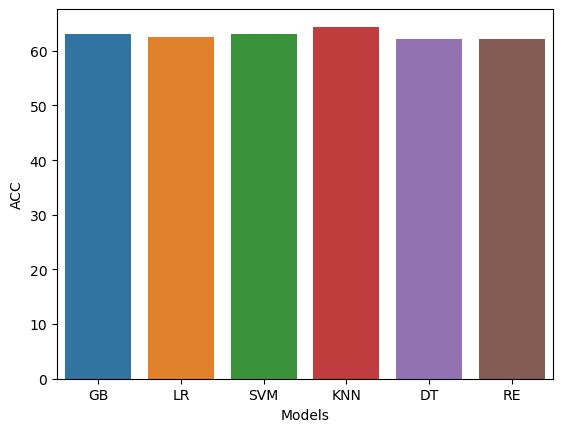

In [90]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [96]:
X

,CGPA,Speaking Skills,ML Knowledge
0,6.7,2,5
1,8.2,3,2
2,6.5,4,3
3,8.7,2,5
4,9.1,3,5
...,...,...,...
735,7.1,2,2
736,9.2,5,5
737,7.9,4,4
738,7.3,2,2


In [97]:
Y

0      1
1      0
2      0
3      0
4      1
      ..
735    1
736    0
737    1
738    0
739    0
Name: Placement Status, Length: 740, dtype: object

In [98]:
X

,CGPA,Speaking Skills,ML Knowledge
0,6.7,2,5
1,8.2,3,2
2,6.5,4,3
3,8.7,2,5
4,9.1,3,5
...,...,...,...
735,7.1,2,2
736,9.2,5,5
737,7.9,4,4
738,7.3,2,2


In [100]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [102]:
lr=LogisticRegression()
lr.fit(X,Y_encoded)

LogisticRegression()

In [112]:
new_data.isnull().sum()

First Name             0
Email ID               0
Attendee Status        0
College Name           0
Designation            0
CGPA                   0
Speaking Skills        0
ML Knowledge           0
Placement Status    3796
dtype: int64

In [115]:
new_data=pd.read_excel(r'/Users/BaBa/Downloads/Input Data/Prediction of Placement Status Data/Test Data.xlsx')

In [116]:
new_data.head()

,First Name,Email ID,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,"symbiosis institute of technology, pune",Students,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,"mit academy of engineering ,alandi",Students,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,a. c. patil college of engineering,Students,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,wilson college,Students,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,"ld college of engineering, ahmedabad, gujarat",Students,6.7,5,5,NaN


In [119]:
new_data.shape()

TypeError: 'tuple' object is not callable

In [120]:
new_data.shape

(3796, 8)

In [121]:
new_data.dtypes

First Name           object
Email ID             object
College Name         object
Designation          object
CGPA                float64
Speaking Skills       int64
ML Knowledge          int64
Placement Status    float64
dtype: object

In [122]:
df_copy.dtypes

First Name           object
College Name         object
Designation          object
CGPA                float64
Speaking Skills       int64
ML Knowledge          int64
Placement Status      int64
dtype: object

In [124]:
new_data.head()

,First Name,Email ID,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,"symbiosis institute of technology, pune",Students,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,"mit academy of engineering ,alandi",Students,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,a. c. patil college of engineering,Students,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,wilson college,Students,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,"ld college of engineering, ahmedabad, gujarat",Students,6.7,5,5,NaN


In [125]:
new_data=pd.read_excel(r'/Users/BaBa/Downloads/Input Data/Prediction of Placement Status Data/Test Data.xlsx')

In [126]:
new_data.head()

,First Name,Email ID,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,"symbiosis institute of technology, pune",Students,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,"mit academy of engineering ,alandi",Students,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,a. c. patil college of engineering,Students,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,wilson college,Students,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,"ld college of engineering, ahmedabad, gujarat",Students,6.7,5,5,NaN


In [127]:
new_data=pd.read_excel(r'/Users/BaBa/Downloads/Input Data/Prediction of Placement Status Data/Test Data.xlsx')

In [128]:
new_data.head()

,First Name,Email ID,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,"symbiosis institute of technology, pune",Students,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,"mit academy of engineering ,alandi",Students,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,a. c. patil college of engineering,Students,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,wilson college,Students,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,"ld college of engineering, ahmedabad, gujarat",Students,6.7,5,5,NaN


In [130]:
new_data_columns = ['CGPA', 'Speaking Skills', 'ML Knowledge']
testing_df=df[new_data_columns].copy()

In [131]:
testing_df.head()

,CGPA,Speaking Skills,ML Knowledge
0,6.7,2,5
1,8.2,3,2
2,6.5,4,3
3,8.7,2,5
4,9.1,3,5


In [132]:
new_test_data_selected = new_data[new_data_columns].copy()

In [133]:
predictions = lr.predict(new_test_data_selected)

In [134]:
prob=lr.predict(new_test_data_selected)

In [135]:
output_df = pd.DataFrame({'Predictions': predictions})

In [136]:
output_df.to_csv('predictions.csv', index=True)

In [137]:
output_df.head()

,Predictions
0,0
1,0
2,0
3,0
4,0


In [138]:
new_data.head()

,First Name,Email ID,College Name,Designation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,"symbiosis institute of technology, pune",Students,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,"mit academy of engineering ,alandi",Students,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,a. c. patil college of engineering,Students,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,wilson college,Students,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,"ld college of engineering, ahmedabad, gujarat",Students,6.7,5,5,NaN


In [139]:
import os
os.getcwd()


'/Users/BaBa/Python'

In [143]:
import shutil

source_file = 'predictions.csv'

destination_directory = '/Users/BaBa/Downloads'

shutil.move(source_file, destination_directory)


'/Users/BaBa/Downloads/predictions.csv'